In [1]:
from config import api_key
from googleapiclient.discovery import build
import pandas as pd
import json
import requests
import datetime
from pprint import pprint
from matplotlib import pyplot as plt

In [2]:
#df = pd.read_csv("US_youtube_trending_data.csv")
#df.head()


In [3]:
#import json
#with open("US_category_id.json") as f: categoryID = json.load(f)
#categoryID, l_c = categoryID['items'], len(categoryID['items'])
#ID_to_Category = dict(zip([int(categoryID[i]['id']) for i in range(l_c)],
                          #[categoryID[i]['snippet']['title'] for i in range(l_c)]))

In [4]:
youtube = build('youtube','v3',developerKey=api_key)

In [5]:
request = youtube.videoCategories().list(
        part="snippet",
        regionCode="US")
response = request.execute()
pprint(response)

{'etag': 'QteLrrS_X7rM7rlcU_e7qa0embQ',
 'items': [{'etag': 'grPOPYEUUZN3ltuDUGEWlrTR90U',
            'id': '1',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Film & Animation'}},
           {'etag': 'Q0xgUf8BFM8rW3W0R9wNq809xyA',
            'id': '2',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Autos & Vehicles'}},
           {'etag': 'qnpwjh5QlWM5hrnZCvHisquztC4',
            'id': '10',
            'kind': 'youtube#videoCategory',
            'snippet': {'assignable': True,
                        'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
                        'title': 'Music'}},
           {'etag': 'HyFIixS5BZaoBdkQdLzPdoXWipg',
            'id': '15',
            'kind': 'youtube#videoCategory',
 

In [6]:
category_number = []
categories = []
x = 0
for item in response["items"]:
    category_number.append(response["items"][x]["id"])
    categories.append(response["items"][x]["snippet"]["title"])
    x = x + 1
    

category_index = {}
for key in category_number:
    for value in categories:
        category_index[key] = value
        categories.remove(value)
        break
category_index.pop("18")
category_number.remove("18")
category_index.pop("19")
category_number.remove("19")
category_index.pop("21")
category_number.remove("21")
category_index.pop("27")
category_number.remove("27")
category_index.pop("30")
category_number.remove("30")
category_index.pop("31")
category_number.remove("31")
category_index.pop("32")
category_number.remove("32")
category_number.remove("33")
category_index.pop("33")
category_number.remove("34")
category_index.pop("34")
category_number.remove("35")
category_index.pop("35")
category_number.remove("36")
category_index.pop("36")
category_number.remove("37")
category_index.pop("37")
category_number.remove("38")
category_index.pop("38")
category_number.remove("39")
category_index.pop("39")
category_number.remove("40")
category_index.pop("40")
category_number.remove("41")
category_index.pop("41")
category_number.remove("42")
category_index.pop("42")
category_number.remove("43")
category_index.pop("43")
category_number.remove("44")
category_index.pop("44")
print(category_index)

x = 0

print(category_number)

{'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '20': 'Gaming', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '28': 'Science & Technology', '29': 'Nonprofits & Activism'}
['1', '2', '10', '15', '17', '20', '22', '23', '24', '25', '26', '28', '29']


In [11]:
index_df = pd.DataFrame({"Genre":category_index},index = category_number)
index_df["Index"] = category_number
index_numbers_df = index_df["Index"]

1      1
2      2
10    10
15    15
17    17
20    20
22    22
23    23
24    24
25    25
26    26
28    28
29    29
Name: Index, dtype: object

In [17]:
likes = {}
views = {}
for row in index_df["Genre"]:
    likes[row] = []   
    views[row] = []

In [19]:
n = 0
x = 0
y = 0
for row in index_df["Genre"]:
    request = youtube.videos().list(
        part="statistics",
        chart="mostPopular",
        regionCode="US",
        videoCategoryId=index_numbers_df.iloc[n]
        )
    response = request.execute()
    for item in response["items"]:
        try:
            likes[(index_df["Genre"].iloc[y])].append(response["items"][x]["statistics"]["likeCount"])
            views[(index_df["Genre"].iloc[y])].append(response["items"][x]["statistics"]["viewCount"])
            x = x + 1
        except KeyError:
            likes[(index_df["Genre"].iloc[y])].append("0")
            views[(index_df["Genre"].iloc[y])].append(response["items"][x]["statistics"]["viewCount"])
            x = x + 1
    y = y + 1
    x = 0
    n = n + 1
print(likes)
print(views)

{'Film & Animation': ['219147', '1193238', '0', '596480', '715768'], 'Autos & Vehicles': ['1054790', '1765791', '1214709', '456331', '892325'], 'Music': ['566951', '89542', '120230', '251770', '224835'], 'Pets & Animals': ['1457951', '941950', '546381', '1000805', '1165003'], 'Sports': ['842801', '186225', '477176', '1236947', '120222'], 'Gaming': ['14136', '28752', '29127', '76092', '13441'], 'People & Blogs': ['41761', '6506', '9426', '13146', '81291'], 'Comedy': ['219147', '1193238', '257248', '596480', '715768'], 'Entertainment': ['2192562', '1765791', '427020', '1462814', '846571'], 'News & Politics': ['278799', '203037', '72901', '145383', '101942'], 'Howto & Style': ['2701031', '874104', '1054790', '542051', '1556303'], 'Science & Technology': ['523039', '60092', '38965', '14249', '63161'], 'Nonprofits & Activism': ['16295', '3473', '1980', '793328']}
{'Film & Animation': ['3434002', '14500662', '6476852', '7560438', '10892406'], 'Autos & Vehicles': ['21605794', '41275548', '167

In [113]:
views["Nonprofits & Activism"].append("0")
likes["Nonprofits & Activism"].append("0")
print(views["Nonprofits & Activism"])

['789941', '42740', '111053', '17683350', '0', '0']


In [115]:
views0 = [elem[0] for elem in views.values()]
views1 = [elem[1] for elem in views.values()]
views2 = [elem[2] for elem in views.values()]
views3 = [elem[3] for elem in views.values()]
views4 = [elem[4] for elem in views.values()]

likes0 = [elem[0] for elem in likes.values()]
likes1 = [elem[1] for elem in likes.values()]
likes2 = [elem[2] for elem in likes.values()]
likes3 = [elem[3] for elem in likes.values()]
likes4 = [elem[4] for elem in likes.values()]

In [221]:
views_per_genre_df = pd.DataFrame({"Genre":views.keys(),"Views0":views0,"Views1":views1,"Views2":views2,"Views3":views3,"Views4":views4})
likes_per_genre_df = pd.DataFrame({"Genre":views.keys(),"Likes0":likes0,"Likes1":likes1,"Likes2":likes2,"Likes3":likes3,"Likes4":likes4})
views_per_genre_df['Views0'] = views_per_genre_df['Views0'].astype(float)
views_per_genre_df['Views1'] = views_per_genre_df['Views1'].astype(float)
views_per_genre_df['Views2'] = views_per_genre_df['Views2'].astype(float)
views_per_genre_df['Views3'] = views_per_genre_df['Views3'].astype(float)
views_per_genre_df['Views4'] = views_per_genre_df['Views4'].astype(float)
likes_per_genre_df['Likes0'] = likes_per_genre_df['Likes0'].astype(float)
likes_per_genre_df['Likes1'] = likes_per_genre_df['Likes1'].astype(float)
likes_per_genre_df['Likes2'] = likes_per_genre_df['Likes2'].astype(float)
likes_per_genre_df['Likes3'] = likes_per_genre_df['Likes3'].astype(float)
likes_per_genre_df['Likes4'] = likes_per_genre_df['Likes4'].astype(float)
views_per_genre_df

,Genre,Views0,Views1,Views2,Views3,Views4
0,Film & Animation,3434002.0,14500662.0,6476852.0,7560438.0,10892406.0
1,Autos & Vehicles,21605794.0,41275548.0,16701037.0,8516670.0,16467889.0
2,Music,9589149.0,4323381.0,2360096.0,8282534.0,5495476.0
3,Pets & Animals,23296435.0,13629082.0,14549030.0,18190967.0,23339155.0
4,Sports,16283589.0,4875298.0,7669683.0,13528142.0,2858306.0
5,Gaming,274407.0,327968.0,233918.0,1249479.0,170803.0
6,People & Blogs,780429.0,163860.0,70520.0,209878.0,1218109.0
7,Comedy,3434002.0,14500662.0,4543421.0,7560438.0,10892406.0
8,Entertainment,34575714.0,41275548.0,8760304.0,24085777.0,36835330.0
9,News & Politics,3190201.0,3290011.0,1252234.0,2833376.0,2110047.0


In [223]:
views_per_genre_df = views_per_genre_df.drop('Genre', axis=1)
likes_per_genre_df = likes_per_genre_df.drop('Genre', axis=1)

likes_sum = {}
views_sum = {}
y = 0
for row in index_df["Genre"]:
    likes_sum[row] = []   
    views_sum[row] = []

for row in index_df["Genre"]:
    views_sum[(index_df["Genre"].iloc[y])].append(views_per_genre_df.iloc[y].sum(axis=0))
    likes_sum[(index_df["Genre"].iloc[y])].append(likes_per_genre_df.iloc[y].sum(axis=0))
    y = y + 1



In [225]:

print(likes_sum)

{'Film & Animation': [2724633.0], 'Autos & Vehicles': [5383946.0], 'Music': [1253328.0], 'Pets & Animals': [5112090.0], 'Sports': [2863371.0], 'Gaming': [161548.0], 'People & Blogs': [152130.0], 'Comedy': [2981881.0], 'Entertainment': [6694758.0], 'News & Politics': [802062.0], 'Howto & Style': [6728279.0], 'Science & Technology': [699506.0], 'Nonprofits & Activism': [815076.0]}


ValueError: x must be 1D

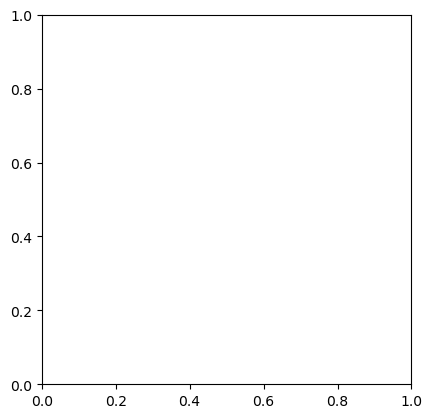

In [203]:
labels = [list(likes_sum.keys())]
sizes = [list(likes_sum.values())]

# Plot
plt.pie(sizes, labels=labels)

plt.axis('equal')
plt.show()